### Ⅰ. Estimating Resemblance of MIDI Documents

#### [0]. 참고 사이트
- https://www.eecs.harvard.edu/%7Emichaelm/NEWWORK/postscripts/music.pdf

#### [1]. 내용
- "텍스트 유사성"을 바탕 ( Hashing technique for text similarity
    - Jaccard Index ( 자카드 인덱스) 
        + r(A;B) : 0 ~ 1 사이의 값 ( 1 : 동일 )
    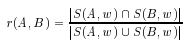
    - Midi 데이터 적용 시 한계점
        + 다성 ( Polyphony )
            - 텍스트 : byte sequence
            - 음악 노트 : 논리적으로 병렬적 발생
                - 따라서, 음표 이벤트의 일련의 직렬화 과정이 필요
- 분리 작업
    - pitch by pitch ( 128가지 )
        - 음높이의 음표를 분리
        - 각 음높이의 음표 시작 시간의 시퀀스를 독립적으로 지문화
        - 연속 부분 수열을 (쉴글) 로 그룹화
    - 시간 별 ( tick )
        - MIDI 파일의 시간 : tick (1/120분)
    - tempo

In [1]:
!pip install editdistance

In [2]:
import mido
import editdistance

#### (0). 파일 분리

In [3]:
def concat_path(path, child):
    return path + "/" + child

#### (1). compare 파일

In [ ]:
def compare_midi_file(file1, file2):
    mid1 = mido.MidiFile(file1)
    mid2 = mido.MidiFile(file2)
    
    note1 = []
    for msg in mido.merge_tracks(mid1.tracks):
        

In [8]:
mid1 = mido.MidiFile(file1)

note1=[]
for msg in mido.merge_tracks(mid1.tracks):
    if 'note_on' in msg.type:
        

MidiFile(type=1, ticks_per_beat=120, tracks=[
  MidiTrack([
    MetaMessage('sequencer_specific', data=(0, 0, 65), time=0),
    MetaMessage('track_name', name='JESU        ', time=0),
    MetaMessage('key_signature', key='G', time=0),
    MetaMessage('midi_port', port=0, time=0),
    MetaMessage('time_signature', numerator=9, denominator=8, clocks_per_click=24, notated_32nd_notes_per_beat=8, time=0),
    MetaMessage('set_tempo', tempo=500000, time=38340),
    MetaMessage('end_of_track', time=0)]),
  MidiTrack([
    MetaMessage('track_name', name="Jesu, Joy of Man's", time=0),
    MetaMessage('instrument_name', name='Synths Strings 1', time=0),
    MetaMessage('midi_port', port=0, time=0),
    Message('control_change', channel=0, control=0, value=80, time=0),
    Message('control_change', channel=0, control=32, value=0, time=0),
    Message('program_change', channel=0, program=50, time=0),
    Message('note_on', channel=0, note=67, velocity=104, time=60),
    Message('note_on', channel=

In [5]:
file1 = concat_path('midi_data', 'jesu1.mid')
file2 = concat_path('midi_data', 'jesu2.mid')

similarity = compare_midi_file(file1, file2)

print(similarity)

NameError: name 'compare_midi_file' is not defined